In [5]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/PSY - GANGNAM STYLE(강남스타일) MV.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 19710
                    user_id             username  \
0  UCbukoDd_O9FYVUzcMsfwo5A  @CarloDecarli-yr8hd   
1  UCEEndkRL-3zniGk0JlMtppg  @bts.uzb.army.30.18   
2  UCsGePd980GYc-hf_QM-p7xw             @Fjbxkb8   
3  UCyZb1dbqWEmcCd86uWYiLZg          @marvinmaru   
4  UC5pr9qJv0F-PgUCZXyV5zsA               @Yueyh   

                                             comment  likes  replies  \
0                                   Chi par o cazz??      0        0   
1                                   October 20, 2024      1        0   
2  12 years has passed so quickly, my childhood h...      1        0   
3                            2024 🎉🎉🎉🎉 here ====>>>>      0        0   
4                                              나는 이제      0        0   

                   date                              video  contains_emoji  
0  2024-10-20T16:50:03Z  PSY - GANGNAM STYLE(강남스타일) MV.csv           False  
1  2024-10-20T16:48:25Z  PSY - GANGNAM S

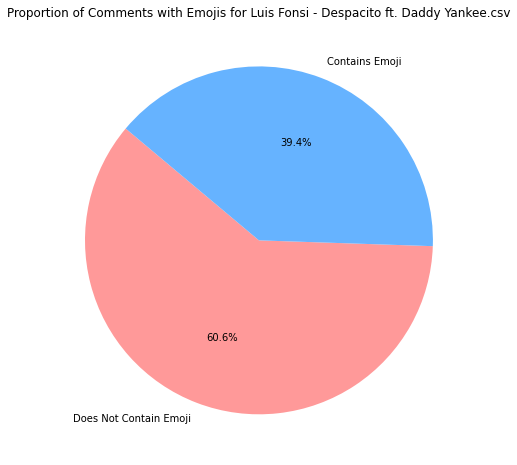

In [6]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [7]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-7-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
3,UCyZb1dbqWEmcCd86uWYiLZg,@marvinmaru,2024 🎉🎉🎉🎉 here ====>>>>,0,0,2024-10-20T16:31:57Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
4,UC5pr9qJv0F-PgUCZXyV5zsA,@Yueyh,나는 이제,0,0,2024-10-20T16:26:53Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,2
5,UCfTLmrSJ0qi8BvqXJ3TLvJQ,@Wave_editz77,Anyone in 2025🎉👇🏻 like,1,0,2024-10-20T16:25:59Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
6,UCMxlkaObGk-kkGHwhWQlPtA,@EmmaSmith-t3q,I was not expecting to see people still watchi...,2,0,2024-10-20T16:25:14Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
13,UC4U9KNO4Nf-ZhNi2j_Xaa_g,@aneeshkumar1239,കിങ്ങിണിയുടെ റീൽ കണ്ട് വന്നവരുണ്ടോ 😂😂😂,0,0,2024-10-20T15:46:10Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
...,...,...,...,...,...,...,...,...,...
49987,UCCG_GzUoCeHJ82IYJ0P-Sqw,@MRMK748,It's 2024 still a masterpiece ❤,6,0,2024-01-11T16:21:14Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
49990,UC1FdxvN1Clav57hErd5eVTQ,@paelnoface29,Here because ronaldo and coca cola😅,1,0,2024-01-11T16:14:10Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
49992,UC_1ha9RbNxeD1Up29ZBtrUw,@AdaiLexFF,¿Alguien del 2024 escuchando de nuevo este tre...,1,2,2024-01-11T15:21:54Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1
49995,UC8xLzTKtx4IO-AOhWiwgXYQ,@Nirob_gaming11,Funny song😂😂,1,0,2024-01-11T15:14:27Z,PSY - GANGNAM STYLE(강남스타일) MV.csv,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'PSY - GANGNAM STYLE(강남스타일) MV.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 4: Detected language: nl
Row 4: Original: 2024 🎉🎉🎉🎉 here ====>>>>, Translated: 2024  here ====>>>> 🎉🎉🎉🎉
Row 4 saved.
Row 5: Text contains only emojis or is empty: 나는 이제
Row 5 saved.
Row 6: Detected language: tl
Row 6: Original: Anyone in 2025🎉👇🏻 like, Translated: Anyone in 2025 like 🎉👇🏻
Row 6 saved.
Row 7: Detected language: en
Row 7: Original: I was not expecting to see people still watching this and to see comments saying like 3 mins ago 😂, Translated: I was not expecting to see people still watching this and to see comments saying like 3 mins ago 😂
Row 7 saved.
Row 14: Detected language: ml
Row 14: Original: കിങ്ങിണിയുടെ റീൽ കണ്ട് വന്നവരുണ്ടോ 😂😂😂, Translated: Has anyone seen the reel of Kingini? 😂😂😂
Row 14 saved.
Row 16: Detected language: de
Row 16: Original: 5.3 BILLION VIEWS. 😮, Translated: 5.3 BILLION VIEWS. 😮
Row 16 saved.
Row 18: Error translating text: 24년 10월 21일에 보는 사람 손 일단 나부터, Error: No features in text.
Row 18 saved.
Row 20: Detected language: ru
Row 20: Original: Эт

Row 129: Original: Tanga manga estar😂😂, Translated: Thong sleeve stand 😂😂
Row 129 saved.
Row 132: Detected language: en
Row 132: Original: EXO and BTS ❤❤, Translated: EXO and BTS ❤❤
Row 132 saved.
Row 133: Error translating text: 2024 👉🏻, Error: No features in text.
Row 133 saved.
Row 134: Detected language: pt
Row 134: Original: @avelanebarbosasantos8170
hace 3 días
Vai voltar a bombar ❤ ela atravessa épocas e gerações kkk, Translated: @avelanebarbosasantos8170 
3 days ago 
It's going to be a hit again, it crosses eras and generations lol ❤
Row 134 saved.
Row 136: Detected language: bn
Row 136: Original: কোরেরো😂, Translated: Korero 😂
Row 136 saved.
Row 137: Detected language: pl
Row 137: Original: Polska halo🖤, Translated: Poland hello 🖤
Row 137 saved.
Row 141: Text contains only emojis or is empty: 😅😅😅😅😅
Row 141 saved.
Row 142: Text contains only emojis or is empty: 🗿
Row 142 saved.
Row 146: Error translating text: 🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑🏻‍💼🧑

Row 272: Original: Vbns😁😄😄😄, Translated: Vbns 😁😄😄😄
Row 272 saved.
Row 274: Detected language: es
Row 274: Original: Es la mejor canción del mundo 🌎 😂❤😂❤😂❤😂❤😂❤😂❤😂, Translated: It's the best song in the world 🌎😂❤😂❤😂❤😂❤😂❤😂❤😂
Row 274 saved.
Row 281: Detected language: es
Row 281: Original: Aun se escucha❤😂, Translated: It is still heard ❤😂
Row 281 saved.
Row 282: Error translating text: 2024❤, Error: No features in text.
Row 282 saved.
Row 285: Detected language: fi
Row 285: Original: Helou❤, Translated: Hello ❤
Row 285 saved.
Row 287: Error translating text: 이게 벌써 12년전라고?? 시간 엄청빠르다..., Error: No features in text.
Row 287 saved.
Row 293: Detected language: en
Row 293: Original: Bruh I was 4 when this came out😭😭, Translated: Bruh I was 4 when this came out 😭😭
Row 293 saved.
Row 296: Detected language: en
Row 296: Original: Watching it in 2024 🎉, Translated: Watching it in 2024 🎉
Row 296 saved.
Row 298: Detected language: pt
Row 298: Original: 1:08 nostalgic 💯, Translated: 1:08 nostalgic 💯
R

Row 445: Original: Desde Colombia 🇨🇴, Translated: From Colombia 🇨🇴
Row 445 saved.
Row 447: Detected language: pt
Row 447: Original: Fala brasileiros, escrevendo aqui no dia 18/10/2024, quem ver esse comentario no futuro escreve alguma coisa aqui 😂❤, Translated: Hi Brazilians, writing here on 10/18/2024, whoever sees this comment in the future writes something here 😂❤
Row 447 saved.
Row 449: Detected language: en
Row 449: Original: This song will never get old💖, Translated: This song will never get old 💖
Row 449 saved.
Row 450: Detected language: ru
Row 450: Original: Кто из 2024 года😂, Translated: Who from 2024 😂
Row 450 saved.
Row 451: Text contains only emojis or is empty: 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷
Row 451 saved.
Row 453: Detected language: pt
Row 453: Original: 🇧🇷 cá estamos em outubro de 2024🇧🇷, Translated: here we are in October 2024 🇧🇷🇧🇷
Row 453 saved.
Row 456: Detected language: en
Row 456: Original: The song of my childhood❤❤, Translated: The song of my childhood ❤❤
Row 456 saved.

Row 640: Original: El mejor temazo de la historia 👌, Translated: The best song in history 👌
Row 640 saved.
Row 645: Detected language: en
Row 645: Original: Who came to watch it in 2024?👋👋, Translated: Who came to watch it in 2024? 👋👋
Row 645 saved.
Row 658: Error translating text: 2024🔥, Error: No features in text.
Row 658 saved.
Row 663: Detected language: en
Row 663: Original: Better than ksi 🗿🔥🔥🔥🔥🔥, Translated: Better than ksi 🗿🔥🔥🔥🔥🔥
Row 663 saved.
Row 665: Detected language: da
Row 665: Original: Send me gift 🎁, Translated: Send me gift 🎁
Row 665 saved.
Row 672: Error translating text: 언제봐도 재미있다. ㅋㅋㅋㅋ😂, Error: No features in text.
Row 672 saved.
Row 678: Detected language: en
Row 678: Original: who here 2024😂, Translated: who here 2024 😂
Row 678 saved.
Row 679: Text contains only emojis or is empty: こんにちは
Row 679 saved.
Row 680: Detected language: id
Row 680: Original: assalamu'alaikum wrb salam kenal RIVALDO SELIAN Aceh Tenggara Kutacane🙏🌹🌹🌹 semoga kk🙏🌹 PSY panjang umur murah rez

Row 714: Original: Alguém em outubro de 2024😅😅, Translated: Someone in October 2024 😅😅
Row 714 saved.
Row 717: Detected language: id
Row 717: Original: Again 2024 !!😁😁, Translated: Again 2024 !! 😁😁
Row 717 saved.
Row 722: Detected language: id
Row 722: Original: Diría mayito Bezares tangamanga style jajaja🫶🏾, Translated: I would say Mayito Bezares tangamanga style hahaha🫶 🏾
Row 722 saved.
Row 725: Detected language: es
Row 725: Original: Alguien 2024😎, Translated: Someone 2024 😎
Row 725 saved.
Row 727: Text contains only emojis or is empty: 😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😂😮😮😮😮😮😮😮😮😅😮😮😮😮😮😮😮😮😮😮😮😮😮😮😊😮😊😊😊😮😮😮😮😮😢🎉😮😮😮😮😮😮
Row 727 saved.
Row 728: Error translating text: 0.25x💀💀🤣🤣🤣🤣🤣🤣🤣, Error: No features in text.
Row 728 saved.
Row 730: Detected language: en
Row 730: Original: Who here in 2024 👇👇, Translated: Who here in 2024 👇👇
Row 730 saved.
Row 734: Detected language: en
Row 734: Original: Who is watching in 2024? Its almost 2025😢, Translated: Who is watch

Row 865: Original: Кто смотрит 15 декабря привет 👋, Translated: Who's watching December 15th, hello 👋
Row 865 saved.
Row 867: Detected language: en
Row 867: Original: I didn't realize that this song blew up THAT much, it has 5 BILLION views 😅😅, Translated: I didn't realize that this song blew up THAT much, it has 5 BILLION views 😅😅
Row 867 saved.
Row 868: Detected language: en
Row 868: Original: I think This Song NEVER gonna   old.😂😂😂😂, Translated: I think This Song NEVER gonna   old. 😂😂😂😂
Row 868 saved.
Row 870: Text contains only emojis or is empty: 🇩🇴🇩🇴🇩🇴🇩🇴🇩🇴🇩🇴🇩🇴🇩🇴
Row 870 saved.
Row 871: Detected language: en
Row 871: Original: October ⚓ like 👍, Translated: October  like ⚓👍
Row 871 saved.
Row 872: Text contains only emojis or is empty: 설레는 최신순
Row 872 saved.
Row 873: Text contains only emojis or is empty: 한국 화이팅
Row 873 saved.
Row 875: Detected language: en
Row 875: Original: Indian Audience 🇮🇳✅✅
.
.
.
.
.
.
.
.
.
.
.
.
Subscribe  bi Karr doo Abb 😋😋, Translated: Indian Audience 
.


Row 1002: Original: Tik Tok no hubiese aguantado la presión de este temazo 🤣🤣🤣🔥🔥, Translated: Tik Tok wouldn't have been able to handle the pressure of this hit song 🤣🤣🤣 🔥🔥
Row 1002 saved.
Row 1004: Detected language: cy
Row 1004: Original: Ln o4😂, Translated: Ln o4 😂
Row 1004 saved.
Row 1007: Error translating text: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂🤣, Error: No features in text.
Row 1007 saved.
Row 1012: Detected language: en
Row 1012: Original: Greetings from Ukraine 💞, Translated: Greetings from Ukraine 💞
Row 1012 saved.
Row 1013: Detected language: en
Row 1013: Original: Gamestop to the moon 🚀, Translated: Gamestop to the moon 🚀
Row 1013 saved.
Row 1018: Error translating text: 벌써 12년전이라닏ㄷㄷ, Error: No features in text.
Row 1018 saved.
Row 1025: Detected language: de
Row 1025: Original: Wer war der beste Mann der bella ciao gewesen und ich liebe dich 😂😂😢😢😢😢🎉, Translated: Who was the best man of bella ciao and I love you 😂😂😢😢😢😢🎉
Row 1025 saved.
Row 1027: Detected language: 

Row 1170: Original: I like this ❤, Translated: I like this ❤
Row 1170 saved.
Row 1171: Text contains only emojis or is empty: 🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿
Row 1171 saved.
Row 1175: Detected language: sw
Row 1175: Original: なんか時々気痛くなるやつw, Translated: w なんか時々気痛くなるやつ
Row 1175 saved.
Row 1178: Text contains only emojis or is empty: カンナムスタイル改から来た人おる？
Row 1178 saved.
Row 1180: Detected language: da
Row 1180: Original: Vj siddhu fans 🤙🤙🤙🤙🔥🔥💯🔥🔥💯🔥💯💯🔥🔥💯💯💯, Translated: Vj siddhu fans 🤙🤙🤙🤙 🔥🔥💯🔥🔥💯🔥💯💯🔥🔥💯💯💯
Row 1180 saved.
Row 1182: Error translating text: このコメントに1000いいねついたらゲームをやめるつもりです, Error: No features in text.
Row 1182 saved.
Row 1183: Error translating text: 1:08 お兄さんカンナムスタイル, Error: No features in text.
Row 1183 saved.
Row 1186: Text contains only emojis or is empty: 이 노래 아는 사람
Row 1186 saved.
Row 1190: Detected language: en
Row 1190: Original: 13 October 2024 12.33pm...is that 53 billion views😳😳😳😳, Translated: 13 October 2024 12.33pm...is that 53 billion views 😳😳😳😳
Row 1190 saved.
Row 1191: Text contai

Row 1346: Original: 2024 aqui presente 😅😅, Translated: 2024 here present 😅😅
Row 1346 saved.
Row 1347: Detected language: id
Row 1347: Original: halo aku dari masaa depan
17-08-3000　 Balas 　 　 　 ♥9999.9M






Saya dari 2025
　　　
● bea💗
gak mungkin!!😰😰😨💀, Translated: hello i'm from the future
08-17-3000 Reply 9999.9M

i'm from 2025

bea
impossible!! 　　　　♥　　　●💗😰😰😨💀
Row 1347 saved.
Row 1350: Detected language: en
Row 1350: Original: Who come here after getting 10 billion views 🎉😊, Translated: Who come here after getting 10 billion views 🎉😊
Row 1350 saved.
Row 1351: Text contains only emojis or is empty: 👎👎👎👎👎👎
Row 1351 saved.
Row 1352: Text contains only emojis or is empty: 나
Row 1352 saved.
Row 1354: Detected language: sv
Row 1354: Original: 2024 october ❤, Translated: 2024 october ❤
Row 1354 saved.
Row 1355: Detected language: en
Row 1355: Original: Who watching this song on 2024 💥🕺, Translated: Who watching this song on 2024 💥🕺
Row 1355 saved.
Row 1358: Detected language: en
Row 1358: O

Row 1482: Original: これがどうして改やαが出るんやろなぁ, Translated: a これがどうして改やが出るんやろなぁ
Row 1482 saved.
Row 1485: Text contains only emojis or is empty: ❤
Row 1485 saved.
Row 1487: Detected language: tr
Row 1487: Original: 2024 te kafası eserek dinleyen türk kardeşlerime selam olsun 🖐️, Translated: Greetings to my Turkish brothers who are listening with great pleasure in 2024 🖐️
Row 1487 saved.
Row 1489: Detected language: de
Row 1489: Original: OPPA GANGNAM STYLE🗣️🗣️🗣️🔥🔥🔥🔥, Translated: OPPA GANGNAM STYLE 🗣️🗣️🗣️🔥🔥🔥🔥
Row 1489 saved.
Row 1491: Detected language: en
Row 1491: Original: i love it please 😅, Translated: i love it please 😅
Row 1491 saved.
Row 1492: Detected language: pl
Row 1492: Original: 😂😂😂iw❤wiwow😂😂😂, Translated: iwwiwow 😂😂😂❤😂😂😂
Row 1492 saved.
Row 1498: Detected language: en
Row 1498: Original: How does this have the most views on this platform 💀, Translated: How does this have the most views on this platform 💀
Row 1498 saved.
Row 1499: Error translating text: 2024??? 😍, Error: No featu

Row 1617: Original: 2024 llegue aquí por que me volví fan de los k-dramas y la cultura Koreana❤ me encantan; saludos desde Colombia 🇨🇴, Translated: 2024 I arrived here because I became a fan of k-dramas and I love Korean culture; greetings from Colombia ❤🇨🇴
Row 1617 saved.
Row 1619: Detected language: en
Row 1619: Original: Did anyone see at first the man  swinging on the swing in the background 
standing😂, Translated: Did anyone see at first the man  swinging on the swing in the background 
standing 😂
Row 1619 saved.
Row 1620: Detected language: ar
Row 1620: Original: يا قدمها 😂😂😂😂, Translated: Oh her feet 😂😂😂😂
Row 1620 saved.
Row 1625: Detected language: en
Row 1625: Original: who is in 2024 ??❤, Translated: who is in 2024 ?? ❤
Row 1625 saved.
Row 1631: Text contains only emojis or is empty: 🇧🇷😎
Row 1631 saved.
Row 1638: Detected language: en
Row 1638: Original: 3:17 lol why is he filming himself sitting on a toilet? 😂, Translated: 3:17 lol why is he filming himself sitting on a toil

Row 1726: Original: Same vibes 🙌, Translated: Same vibes 🙌
Row 1726 saved.
Row 1731: Error translating text: 10.10.2024🎉🎉🎉🎉, Error: No features in text.
Row 1731 saved.
Row 1732: Text contains only emojis or is empty: ❤❤❤
Row 1732 saved.
Row 1734: Detected language: ru
Row 1734: Original: 10.10.2024 ностальгия 😅, Translated: 10.10.2024 nostalgia 😅
Row 1734 saved.
Row 1735: Detected language: de
Row 1735: Original: Understanding ❌ Vibing ✅, Translated: Understanding  Vibing ❌✅
Row 1735 saved.
Row 1736: Text contains only emojis or is empty: 😂😂😂
Row 1736 saved.
Row 1737: Detected language: en
Row 1737: Original: People watching this in 2024 just for nostalgia
👇, Translated: People watching this in 2024 just for nostalgia 👇
Row 1737 saved.
Row 1739: Detected language: id
Row 1739: Original: Lagu Kesukaan Kami Se Indonesia🇮🇩😅🔥🔥, Translated: Our Favorite Songs in Indonesia 🇮🇩😅🔥🔥
Row 1739 saved.
Row 1741: Detected language: en
Row 1741: Original: Who is here in Oct 2024 

Guys I'm newly crea

Row 1876: Original: α見て改見てから
本家聞きたくて来た人🙋‍♂️, Translated: a
‍ 見て改見てから本家聞きたくて来た人🙋♂️
Row 1876 saved.
Row 1877: Detected language: hu
Row 1877: Original: Já faz 12 anos 😮, Translated: It's been 12 years 😮
Row 1877 saved.
Row 1878: Detected language: ar
Row 1878: Original: ممكن اعرف كيف جابت الاغنية 5 مليار 🙂💥, Translated: Can I know how the song got 5 billion? 🙂💥
Row 1878 saved.
Row 1880: Text contains only emojis or is empty: 😍😍😍😍😍😍😍😍😍😍😍😍
Row 1880 saved.
Row 1882: Text contains only emojis or is empty: 😂😂😂😂❤❤❤❤❤
Row 1882 saved.
Row 1885: Detected language: tr
Row 1885: Original: Yıl 2024 gecenin yarısı 🎉🎉, Translated: Year 2024 midnight 🎉🎉
Row 1885 saved.
Row 1886: Detected language: pt
Row 1886: Original: Brasil 🇧🇷🇧🇷🇧🇷, Translated: Brazil 🇧🇷🇧🇷🇧🇷
Row 1886 saved.
Row 1888: Detected language: cy
Row 1888: Original: 😅arfe, Translated: arfe 😅
Row 1888 saved.
Row 1893: Error translating text: 🥹☺️, Error: No features in text.
Row 1893 saved.
Row 1895: Detected language: en
Row 1895: Original: 1

Row 2010: Original: Fynn

❤, Translated: Fynn ❤
Row 2010 saved.
Row 2018: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
Row 2018 saved.
Row 2020: Detected language: af
Row 2020: Original: Anas vloger ❤, Translated: Anas vlogger ❤
Row 2020 saved.
Row 2022: Detected language: en
Row 2022: Original: Man who introduced k pop to the so called world 🌍, Translated: Man who introduced k pop to the so called world 🌍
Row 2022 saved.
Row 2024: Error translating text: 내가 12살때, Error: No features in text.
Row 2024 saved.
Row 2025: Error translating text: 🇦🇿🤝🇰🇷♥️♥️♥️♥️♥️♥️, Error: No features in text.
Row 2025 saved.
Row 2026: Error translating text: 10/24 🇧🇷, Error: No features in text.
Row 2026 saved.
Row 2029: Detected language: en
Row 2029: Original: I didn't understand a thing.
But enjoyed the last 4 minutes of my life...🔥🔥, Translated: I didn't understand a thing.
But enjoyed the last 4 minutes of my life... 🔥🔥
Row 2029 saved.
Row 2032: Detected language: en
Row 2032: Original: Who is wa

Row 2142: Original: Único kpop que eu gostava e continuo gostando 😂😂😂, Translated: The only kpop I liked and still like 😂😂😂
Row 2142 saved.
Row 2146: Detected language: id
Row 2146: Original: Kon kon 2024 me sun raha hai 😊, Translated: Who is going to be the sun in 2024 😊
Row 2146 saved.
Row 2147: Detected language: en
Row 2147: Original: Who is here in 2024??😅, Translated: Who is here in 2024?? 😅
Row 2147 saved.
Row 2153: Detected language: et
Row 2153: Original: Ჯრიჯრტ❤❤❤, Translated: မြန်မ်း ❤❤❤
Row 2153 saved.
Row 2155: Detected language: tl
Row 2155: Original: Kim Jong un 😮😮😮, Translated: Kim Jong un 😮😮😮
Row 2155 saved.
Row 2158: Detected language: id
Row 2158: Original: 2024 ❤❤ India Assam, Translated: 2024 India Assam ❤❤
Row 2158 saved.
Row 2167: Detected language: pt
Row 2167: Original: Nostalgia bro ❤, Translated: Nostalgia bro ❤
Row 2167 saved.
Row 2170: Detected language: ar
Row 2170: Original: العرببب ويننننننننن😂😂😂😂😂😂, Translated: The Arabs are the best. 😂😂😂😂😂😂
Row 2170 sa

Row 2303: Original: Cxxvhggkjjhjŕrfggghh😊❤❤❤❤❤❤❤❤❤❤😅😅😅, Translated: Cxxvhggkjjhjŕrfggghh 😊❤❤❤❤❤❤❤❤❤❤😅😅😅
Row 2303 saved.
Row 2305: Detected language: en
Row 2305: Original: 5 billion views is incredible 😂, Translated: 5 billion views is incredible 😂
Row 2305 saved.
Row 2306: Detected language: hu
Row 2306: Original: A me😂 2:14, Translated: A me 2:14 😂
Row 2306 saved.
Row 2309: Text contains only emojis or is empty: ❤❤❤😂
Row 2309 saved.
Row 2310: Detected language: en
Row 2310: Original: 2024 kids: this song is weird and Cringe 🤢🤮👎
2012 kids: I love this song 😄🎉🕺💃











Edit: this song was my childhood 🥺, Translated: 2024 kids: this song is weird and Cringe 🤢🤮
2012 kids: I love this song 











Edit: this song was my childhood 🥺 👎😄🎉🕺💃
Row 2310 saved.
Row 2311: Error translating text: 2024😢, Error: No features in text.
Row 2311 saved.
Row 2314: Text contains only emojis or is empty: 😊😊😊😊😊😊😊😂😂😂😂😂😂🎉🎉🎉
Row 2314 saved.
Row 2315: Detected language: en
Row 2315: Original: Ppl who are 

Row 2384: Original: സൂപ്പർ ❤️, Translated: Super ❤️
Row 2384 saved.
Row 2385: Detected language: ml
Row 2385: Original: സൂപ്പർ ❤️, Translated: Super ❤️
Row 2385 saved.
Row 2386: Detected language: no
Row 2386: Original: Tdmlwgj1eiskgoretw❤❤❤😂😂, Translated: Tdmlwgj1eiskgoretw ❤❤❤😂😂
Row 2386 saved.
Row 2389: Text contains only emojis or is empty: バカ
Row 2389 saved.
Row 2391: Detected language: fi
Row 2391: Original: 29 Million likes😊
5 billion views💀, Translated: 29 Million likes
5 billion views 😊💀
Row 2391 saved.
Row 2392: Error translating text: ❤❤10/4/24, Error: No features in text.
Row 2392 saved.
Row 2393: Text contains only emojis or is empty: ❤
Row 2393 saved.
Row 2394: Detected language: sv
Row 2394: Original: Gangnam style 🗣️🔥🔥, Translated: Gangnam style 🗣️🔥🔥
Row 2394 saved.
Row 2396: Text contains only emojis or is empty: 🎉🎉🎉🎉❤❤
Row 2396 saved.
Row 2397: Error translating text: 50億回視聴, Error: No features in text.
Row 2397 saved.
Row 2399: Error translating text: 2:05 😮, Error: 

Row 2519: Original: אני😂😂😂, Translated: I 😂😂😂
Row 2519 saved.
Row 2520: Detected language: es
Row 2520: Original: Tremendo tema me acuerdo cuando la ponía en ka escuela cuando estaba en primaria la mejor infancia ❤🎉🎉🥹, Translated: Tremendous theme, I remember when I put it in school when I was in elementary school, the best childhood 🥹 ❤🎉🎉
Row 2520 saved.
Row 2521: Text contains only emojis or is empty: 구독 좋아요
Row 2521 saved.
Row 2523: Detected language: en
Row 2523: Original: Who else used to play this on their birthdays as a kid😂, Translated: Who else used to play this on their birthdays as a kid 😂
Row 2523 saved.
Row 2524: Detected language: mk
Row 2524: Original: 2024 Еситваткандар барма? 😂😂😂, Translated: Are there any 2024 speakers? 😂😂😂
Row 2524 saved.
Row 2527: Detected language: en
Row 2527: Original: 04-Oct-2024 😎 >, Translated: 04-Oct-2024  > 😎
Row 2527 saved.
Row 2528: Detected language: hu
Row 2528: Original: STILL A BANGER!💅💅💅🔥🔥🔥🔥🔥🔥🔥, Translated: STILL A BANGER! 💅💅💅🔥🔥🔥🔥🔥🔥🔥


Row 2692: Original: PSY (ft. HYUNA) - 오빠는 저스트 스타일 M/V, Translated: PSY (ft. HYUNA) -    M/V 오빠는저스트스타일
Row 2692 saved.
Row 2695: Detected language: de
Row 2695: Original: PSY - GANGNAM STYLE (강남스타일) M/V, Translated: PSY - GANGNAM STYLE () M/V 강남스타일
Row 2695 saved.
Row 2698: Detected language: tr
Row 2698: Original: Yep🚀, Translated: Yep 🚀
Row 2698 saved.
Row 2701: Detected language: en
Row 2701: Original: Reddit/Superstonk down for anyone else? 🚨, Translated: Reddit/Superstonk down for anyone else? 🚨
Row 2701 saved.
Row 2702: Detected language: sq
Row 2702: Original: 강남 사랑해 Korea ♥️, Translated: Korea 강남사랑해♥️
Row 2702 saved.
Row 2703: Detected language: tr
Row 2703: Original: 🚀buy, HODL, DRS, Translated: buy, HODL, DRS 🚀
Row 2703 saved.
Row 2705: Text contains only emojis or is empty: 🚀
Row 2705 saved.
Row 2706: Text contains only emojis or is empty: 🚀🚀🚀🚀
Row 2706 saved.
Row 2708: Detected language: en
Row 2708: Original: The squeeze is coming! Merrill Lynch called me this morning. They

Row 2825: Original: Alguien del 2024😢😂, Translated: Someone from 2024 😢😂
Row 2825 saved.
Row 2826: Detected language: es
Row 2826: Original: Quién del 2024🎉, Translated: Who from 2024 🎉
Row 2826 saved.
Row 2827: Detected language: fr
Row 2827: Original: 21:52 , 02/out eu por Aki 😂😮‍💨😊, Translated: 21:52 , 02/Oct I by Aki ‍ 😂😮💨😊
Row 2827 saved.
Row 2830: Detected language: mk
Row 2830: Original: Кто слушает 2024 ❤, Translated: Who's listening 2024 ❤
Row 2830 saved.
Row 2831: Error translating text: 2024❤, Error: No features in text.
Row 2831 saved.
Row 2835: Detected language: de
Row 2835: Original: Just checking in 💎🙌🏻, Translated: Just checking in 💎🙌🏻
Row 2835 saved.
Row 2839: Detected language: en
Row 2839: Original: Who here in 2025😂, Translated: Who here in 2025 😂
Row 2839 saved.
Row 2841: Detected language: fa
Row 2841: Original: هههههه😂😂😂🎉, Translated: Hahahahahaha 😂😂😂🎉
Row 2841 saved.
Row 2842: Detected language: en
Row 2842: Original: As the prophecy foretold and diamond-handed

Row 2967: Original: Me understanding  0.0000%
Me vibing 100000000000%

From india 🇮🇳, Translated: Me understanding  0.0000%
Me vibing 100000000000%

From india 🇮🇳
Row 2967 saved.
Row 2969: Detected language: fi
Row 2969: Original: Tosi hassu no se vessa juttu tosi tosi hassu vessa juttu mut ei vaan vessa kaikki on kaikki on hauskaa😂😂😂😂😂😂😂😂😂, Translated: Really funny, well, that toilet thing is really really funny, the toilet thing is not just a toilet, everything is fun 😂😂😂😂😂😂😂😂😂
Row 2969 saved.
Row 2971: Error translating text: 2024 🇮🇳😂, Error: No features in text.
Row 2971 saved.
Row 2972: Detected language: en
Row 2972: Original: Anyone here in 2024 watching this one😂, Translated: Anyone here in 2024 watching this one 😂
Row 2972 saved.
Row 2973: Detected language: fr
Row 2973: Original: I from algérien 🇩🇿❤, Translated: I am from Algeria 🇩🇿❤
Row 2973 saved.
Row 2974: Error translating text: この曲がリリースされた時、私は3歳でした😢, Error: No features in text.
Row 2974 saved.
Row 2976: Detected language

Row 3110: Original: LFGOOOO🚀🚀🚀, Translated: LFGOOOO 🚀🚀🚀
Row 3110 saved.
Row 3111: Detected language: ru
Row 3111: Original: Гмсрамб😢😢, Translated: Gmsramb 😢😢
Row 3111 saved.
Row 3112: Error translating text: 2024년 10월에 보는 사람, Error: No features in text.
Row 3112 saved.
Row 3113: Text contains only emojis or is empty: 👍👍👍
Row 3113 saved.
Row 3114: Text contains only emojis or is empty: 🌐
Row 3114 saved.
Row 3117: Error translating text: 10월 2일 출석체크, Error: No features in text.
Row 3117 saved.
Row 3118: Detected language: de
Row 3118: Original: Ape checking in 🍌🍌🦍🦍🚀🚀🌝🌝💎💎🙌🙌 DRS GME, Translated: Ape checking in 🦍🦍 DRS GME 🍌🍌🚀🚀🌝🌝💎💎🙌🙌
Row 3118 saved.
Row 3120: Detected language: en
Row 3120: Original: I dance on this song , at my village on ganpati festival,  people's got crazy after listening this Masterpiece 🎉❤, Translated: I dance on this song , at my village on ganpati festival,  people's got crazy after listening this Masterpiece 🎉❤
Row 3120 saved.
Row 3123: Detected language: ro
Row 31

Row 3262: Original: Ganooo .. Tangamanga style 😊🎉, Translated: Natural.. Handshake style 😊🎉
Row 3262 saved.
Row 3265: Error translating text: 10월 1일 출석체크, Error: No features in text.
Row 3265 saved.
Row 3269: Detected language: ru
Row 3269: Original: Супер время ❤❤❤❤❤❤❤❤, Translated: Super time ❤❤❤❤❤❤❤❤
Row 3269 saved.
Row 3270: Text contains only emojis or is empty: 나도
Row 3270 saved.
Row 3271: Detected language: uk
Row 3271: Original: Уау❤, Translated: Wow ❤
Row 3271 saved.
Row 3272: Error translating text: 설마 지금 2024년9월30일에 듣고있는분들은 없겠지??, Error: No features in text.
Row 3272 saved.
Row 3276: Text contains only emojis or is empty: 이노래 듣고있는 사람 좋아요 하고 구독눌러
그리고 이 노래 조회수 많이 나오네
Row 3276 saved.
Row 3278: Detected language: en
Row 3278: Original: This video is most popular at parties. ❤🎉, Translated: This video is most popular at parties. ❤🎉
Row 3278 saved.
Row 3280: Detected language: id
Row 3280: Original: 30 September 🎉, Translated: 30 September 🎉
Row 3280 saved.
Row 3281: Detected lang

Row 3430: Original: 2024 From Bangladesh 🇧🇩🇧🇩🇧🇩🇧🇩, Translated: 2024 From Bangladesh 🇧🇩🇧🇩🇧🇩🇧🇩
Row 3430 saved.
Row 3432: Detected language: de
Row 3432: Original: 5,3B💀, Translated: 5.3B 💀
Row 3432 saved.
Row 3436: Detected language: fi
Row 3436: Original: 5 Billion views 💀, Translated: 5 Billion views 💀
Row 3436 saved.
Row 3437: Text contains only emojis or is empty: ❤❤❤
Row 3437 saved.
Row 3441: Text contains only emojis or is empty: 謝謝你的這首歌
Row 3441 saved.
Row 3445: Text contains only emojis or is empty: カンナムスタイルって調べて最初に出てくるのカンナムスタイル改で草
Row 3445 saved.
Row 3447: Error translating text: 2:38 🤐🤐🤐🤐🎉🎉🎉🎉, Error: No features in text.
Row 3447 saved.
Row 3448: Error translating text: 와 나 고1땐데 난리도 아니었지
어느덧 내년이면 서른이네, Error: No features in text.
Row 3448 saved.
Row 3450: Text contains only emojis or is empty: 日本人で見てるやついる？
Row 3450 saved.
Row 3454: Error translating text: 2024년9윌29일 듣는사람, Error: No features in text.
Row 3454 saved.
Row 3456: Detected language: vi
Row 3456: Original: ₫ỉ quá nhưn

Row 3563: Original: Ghatttttttttt❤, Translated: Ghattttttttttt ❤
Row 3563 saved.
Row 3565: Error translating text: 52억뷰 ㄹㅈㄷ다, Error: No features in text.
Row 3565 saved.
Row 3567: Detected language: el
Row 3567: Original: このコメを見た日本人へ

「カンナムスタイル・α」が出たぞ！, Translated: a このコメを見た日本人へ「カンナムスタイル・」が出たぞ！
Row 3567 saved.
Row 3569: Text contains only emojis or is empty: 日本勢いないの
Row 3569 saved.
Row 3570: Error translating text: 日本でも10年くらい前に流行った曲
今じゃこんな再生回数いってるんだ, Error: No features in text.
Row 3570 saved.
Row 3572: Detected language: so
Row 3572: Original: Good ❤❤, Translated: Good ❤❤
Row 3572 saved.
Row 3574: Text contains only emojis or is empty: ❤❤❤❤
Row 3574 saved.
Row 3575: Error translating text: 2024?😢😅❤, Error: No features in text.
Row 3575 saved.
Row 3579: Detected language: en
Row 3579: Original: His. Literally. Going. To. Poo
😅, Translated: His. Literally. Going. To. Poo 😅
Row 3579 saved.
Row 3581: Text contains only emojis or is empty: 💜💜💜💜💜💜
Row 3581 saved.
Row 3583: Detected language

Row 3730: Original: 😂 настолько много просмотров ето 100 процентов накрутка, Translated: so many views it's 100 percent a scam 😂
Row 3730 saved.
Row 3732: Text contains only emojis or is empty: 저
Row 3732 saved.
Row 3733: Detected language: ru
Row 3733: Original: Видос бомба, кто из 2024👇, Translated: The video is bomb, who from 2024 👇
Row 3733 saved.
Row 3736: Text contains only emojis or is empty: だめだ、、
何を考えてもあの替え歌を思い出してしまう、、
Row 3736 saved.
Row 3737: Detected language: tl
Row 3737: Original: Tangamanga style❤, Translated: Construction style ❤
Row 3737 saved.
Row 3741: Error translating text: 2024/9/27 출책, Error: No features in text.
Row 3741 saved.
Row 3742: Error translating text: 오늘 보고있는사람?2024926, Error: No features in text.
Row 3742 saved.
Row 3745: Detected language: ru
Row 3745: Original: Этой песне столько сколько и мне😂, Translated: This song is as old as I am 😂
Row 3745 saved.
Row 3746: Error translating text: 1:37😂👿💀, Error: No features in text.
Row 3746 saved.
Row 3749: D

Row 3875: Original: Olá 💫👁️, Translated: Hello 💫👁️
Row 3875 saved.
Row 3876: Detected language: tr
Row 3876: Original: 👇🏾2024de dinleyeler, Translated: They will listen in 2024 👇🏾
Row 3876 saved.
Row 3878: Detected language: en
Row 3878: Original: 2024 like the comment👉, Translated: 2024 like the comment 👉
Row 3878 saved.
Row 3887: Text contains only emojis or is empty: 👉🇺🇿🔥
Row 3887 saved.
Row 3890: Detected language: ru
Row 3890: Original: Йо вы посмотрите на просмотры, впервые вижу такие цифры в ютубе 😅 2024, Translated: Yo, look at the views, this is the first time I've seen such numbers on YouTube 2024 😅
Row 3890 saved.
Row 3891: Error translating text: 🎉🎉🎉🎉❤,🖤👀👻, Error: No features in text.
Row 3891 saved.
Row 3893: Detected language: es
Row 3893: Original: Quien 2024 escuchando este Temazo ❤, Translated: Who in 2024 listening to this great song ❤
Row 3893 saved.
Row 3898: Detected language: en
Row 3898: Original: Why did this song eat tho. I was saying how sexy I was when I was 

Row 4051: Original: 2024년 9월 25일 듣고 계신분?  Please subscribe, Translated: 2024 9 25  ?  Please subscribe 년월일듣고계신분
Row 4051 saved.
Row 4054: Detected language: en
Row 4054: Original: who is there in 2024 🎉, Translated: who is there in 2024 🎉
Row 4054 saved.
Row 4056: Detected language: en
Row 4056: Original: just found out that this song is from Korea😅, Translated: just found out that this song is from Korea 😅
Row 4056 saved.
Row 4058: Detected language: en
Row 4058: Original: Yo😂, Translated: Yo 😂
Row 4058 saved.
Row 4059: Detected language: pt
Row 4059: Original: Sempre um ícone ❤, Translated: Always an icon ❤
Row 4059 saved.
Row 4060: Detected language: en
Row 4060: Original: 2024 I'm here again 😭😭, Translated: 2024 I'm here again 😭😭
Row 4060 saved.
Row 4064: Error translating text: Ƙⁿ🎉😂, Error: No features in text.
Row 4064 saved.
Row 4065: Error translating text: 2024 😂?, Error: No features in text.
Row 4065 saved.
Row 4066: Detected language: sw
Row 4066: Original: China❤, Translate

Row 4180: Original: 23 de setiembre  del 2024  y uno sigo gozando esta musica nunca  dejen de escuchar esta joyita🎉, Translated: September 23, 2024 and I still enjoy this music, never stop listening to this little gem 🎉
Row 4180 saved.
Row 4181: Text contains only emojis or is empty: いい曲です。理解できないけど、雰囲気はいいです👍❤❤
Row 4181 saved.
Row 4187: Detected language: en
Row 4187: Original: Who's watching in 2024?😅, Translated: Who's watching in 2024? 😅
Row 4187 saved.
Row 4189: Detected language: nl
Row 4189: Error translating text: Meeeee❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4189 saved.
Row 4196: Error translating text: 2012년도 얼마안된것같은데 벌써 12년 전이냐.. 어릴때 어른들 10년 20년 후딱 지나간다던데 이런 느낌이었네, Error: No features in text.
Row 4196 saved.
Row 4197: Text contains only emojis or is empty: 절대 질리지 않는다
Row 4197

Row 4311: Error translating text: Quien más en el 2024? 😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4311 saved.
Row 4313: Detected language: de
Row 4313: Error translating text: ITS 2024 NOW AND THIS STILL GOES HARD🔥🔥🔥, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4313 saved.
Row 4316: Text contains only emojis or is empty: ❤❤❤❤❤
Row 4316 saved.
Row 4317: Detected language: ar
Row 4317: Error translating text: ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      ( -_•)▄︻テحكـ━一
     
      (

Row 4379: Error translating text: Qwe,😡, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4379 saved.
Row 4383: Detected language: en
Row 4383: Original: first to the same way that they can?谁说的对宝贝们也不知道啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊宝贝疙瘩汤饺🤟🤲🏻🤲🏻, Translated: first to the same way that they can?🤟🤲🤲 谁说的对宝贝们也不知道啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊宝贝疙瘩汤饺🏻🏻
Row 4383 saved.
Row 4384: Detected language: en
Row 4384: Original: pov:me watching this after 12 years + seeing how kpop was back then👀, Translated: pov:me watching this after 12 years + seeing how kpop was back then 👀
Row 4384 saved.
Row 4385: Detected language: en
Row 4385: Original: My fav Since from 2013❤, Translated: My fav Since from 2013 ❤
Row 4385 saved.
Row 4386: Detected language: en
Row 4386: Original: "2024" and this song showed up in my old playlist 😅😅, Transl

Row 4476: Error translating text: I'm Pakistan ❤❤🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4476 saved.
Row 4477: Error translating text: 2050😂😂😂😂😂, Error: No features in text.
Row 4477 saved.
Row 4480: Detected language: af
Row 4480: Error translating text: 5,29,26,00,323 views on 22SEP24✅, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4480 saved.
Row 4482: Text contains only emojis or is empty: 현아 유재석 노홍철이 다했네요
Row 4482 saved.
Row 4484: Detected language: en
Row 4484: Original: Full enjoy with the vibe songs 🎉🎉🎉🎉❤❤❤❤❤, Translated: Full enjoy with the vibe songs 🎉🎉🎉🎉❤❤❤❤❤
Row 4484 saved.
Row 4487